In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv("../../Desktop/kaggle/Top 50 US Tech Companies 2022 - 2023.csv")
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1905,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1905,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1905,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1905,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1905,26.97,0.653,NVDA,0.189,22473


### The question is: which sector earn more?

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Founding Year,50.0,1905.00000,0.000000,1905.000,1905.00000,1905.0000,1905.00000,1905.000
Annual Revenue 2022-2023 (USD in Billions),50.0,51.20440,97.412880,2.060,7.65250,17.6650,40.81500,513.980
Market Cap (USD in Trillions),50.0,0.25216,0.490377,0.028,0.05125,0.0825,0.16025,2.520
Annual Income Tax in 2022-2023 (USD in Billions),50.0,1.38678,3.687916,-3.217,0.09875,0.2805,0.94500,18.314
Employee Size,50.0,83249.62000,220586.929174,2993.000,14150.00000,24725.0000,70155.75000,1541000.000


In [152]:
df["Industry"] = df["Industry"].astype("category") 
df["Sector"] = df["Sector"].astype("category") 
df["Founding Year "] = df["Founding Year"].astype("int64") 

In [153]:
df.dtypes

Company Name                                          object
Industry                                            category
Sector                                              category
HQ State                                              object
Founding Year                                          int64
Annual Revenue 2022-2023 (USD in Billions)           float64
Market Cap (USD in Trillions)                        float64
Stock Name                                            object
Annual Income Tax in 2022-2023 (USD in Billions)     float64
Employee Size                                          int64
Founding Year                                          int64
dtype: object

In [154]:
df.Sector.head()

0       Consumer Electronics
1    Software Infrastructure
2    Software Infrastructure
3       Software Application
4             Semiconductors
Name: Sector, dtype: category
Categories (8, object): ['Communication Equipments', 'Computer Hardware', 'Consumer Electronics', 'Electronic Components', 'IT Services', 'Semiconductors', 'Software Application', 'Software Infrastructure']

In [155]:
sector_dict = df["Sector"].value_counts().to_dict()
sector_dict

{'Software Application': 15,
 'Semiconductors': 14,
 'Software Infrastructure': 12,
 'Computer Hardware': 3,
 'IT Services': 3,
 'Communication Equipments': 1,
 'Consumer Electronics': 1,
 'Electronic Components': 1}

/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

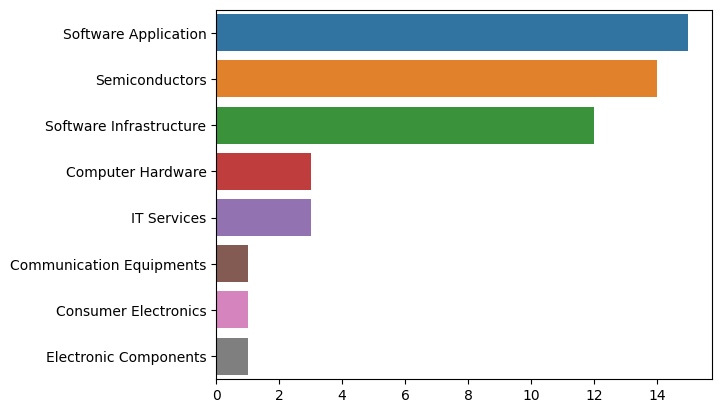

In [156]:
keys = list(sector_dict.keys())
values = list(sector_dict.values())
# Each sector has how many company?
fig = sns.barplot(x=values,y=keys)

### each_sector*avg_of_each_sector = total_earn

In [157]:
mean_grouped_dict = df.groupby("Sector")["Annual Revenue 2022-2023 (USD in Billions)"].mean().to_dict()
grouped_dict

/tmp/ipykernel_13652/1774829970.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_grouped_dict = df.groupby("Sector")["Annual Revenue 2022-2023 (USD in Billions)"].mean().to_dict()


{'Communication Equipments': 53.16,
 'Computer Hardware': 55.48666666666666,
 'Consumer Electronics': 387.53,
 'Electronic Components': 5.61,
 'IT Services': 28.503333333333334,
 'Semiconductors': 23.467857142857145,
 'Software Application': 47.376,
 'Software Infrastructure': 68.56333333333333}

In [160]:
list_of_total_earn_per_year = []
for i in mean_grouped_dict.keys():
    a = float(mean_grouped_dict[i])
    b = float(sector_dict[i])
    list_of_total_earn_per_year.append((i, a*b))
list_of_total_earn_per_year

[('Communication Equipments', 53.16),
 ('Computer Hardware', 166.45999999999998),
 ('Consumer Electronics', 387.53),
 ('Electronic Components', 5.61),
 ('IT Services', 85.51),
 ('Semiconductors', 328.55),
 ('Software Application', 710.64),
 ('Software Infrastructure', 822.76)]

In [161]:
final_dict_object = {}
for i in list_of_total_earn_per_year:
    final_dict_object[i[0]] = i[1]
final_dict_object

{'Communication Equipments': 53.16,
 'Computer Hardware': 166.45999999999998,
 'Consumer Electronics': 387.53,
 'Electronic Components': 5.61,
 'IT Services': 85.51,
 'Semiconductors': 328.55,
 'Software Application': 710.64,
 'Software Infrastructure': 822.76}

## CONCLUSION

/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/emrullahayaz/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

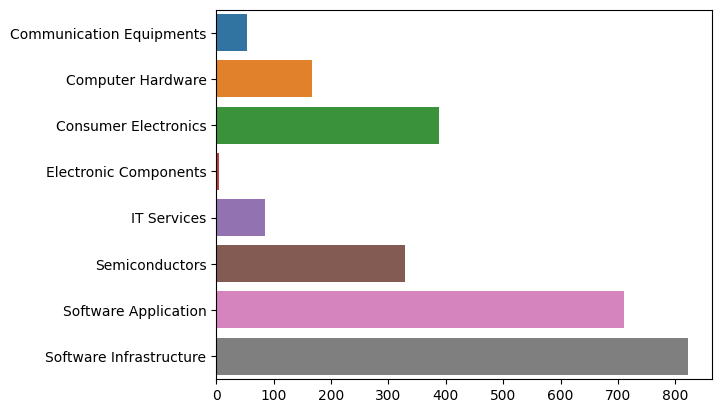

In [163]:
keys = list(final_dict_object.keys())
values = list(final_dict_object.values())
fig = sns.barplot(x=values,y=keys)
fig;